### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### Importing Data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


### Data Exploration

In [3]:
df.shape

(999, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [5]:
### Checking Null Values
df.isnull().sum()

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

### EDA

In [6]:
df['Left Review'].value_counts()

0    502
1    497
Name: Left Review, dtype: int64

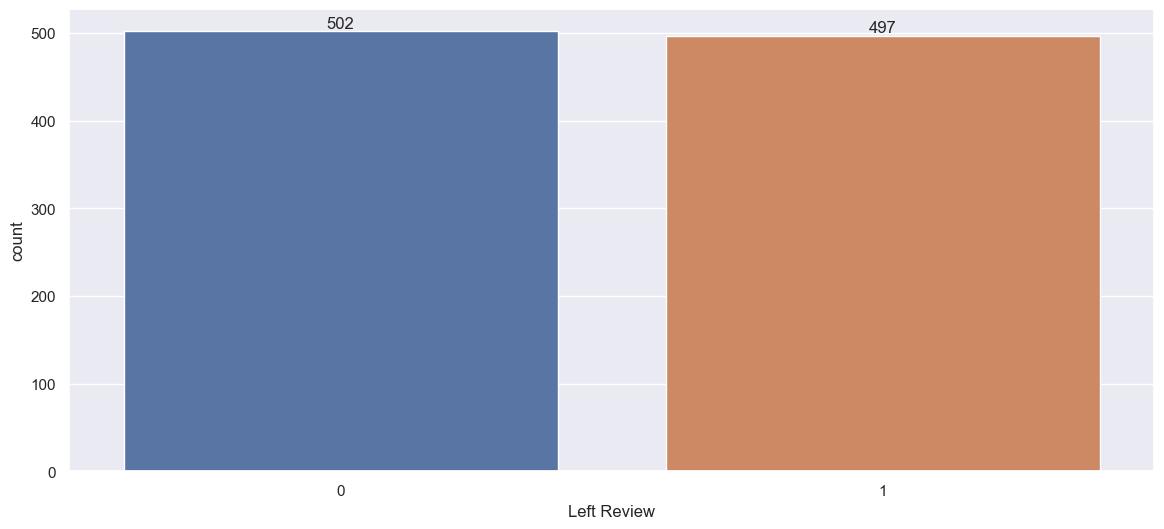

In [7]:
## Plot Bar plot for Left Review
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Left Review',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [8]:
df['Status'].value_counts()

Installed      916
Uninstalled     83
Name: Status, dtype: int64

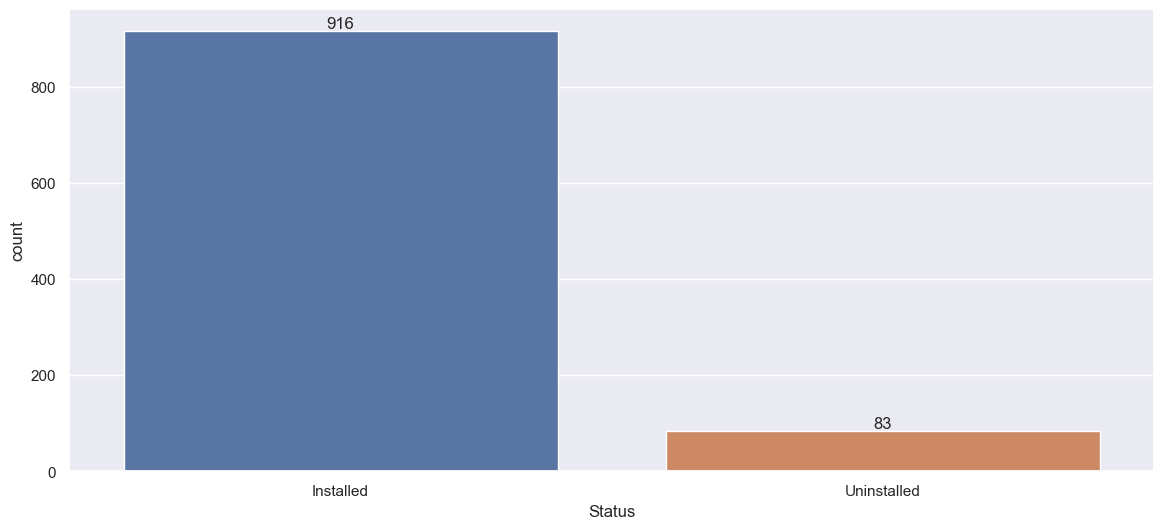

In [9]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Status',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [10]:
### Checking No. of Ratings given by Users
df['Ratings'].value_counts()

9     142
5     141
10    137
7     136
8     133
6     131
2      42
0      38
4      35
3      32
1      32
Name: Ratings, dtype: int64

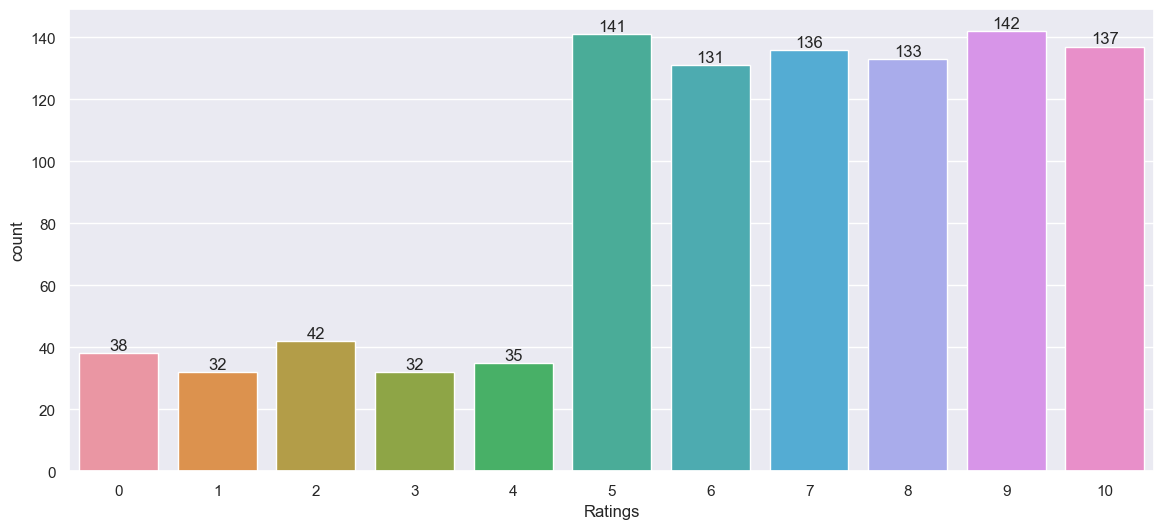

In [11]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Ratings',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [12]:
## Checking howmany times users requests for new Password
df['New Password Request'].value_counts()

6     138
8     123
4     122
1     121
7     120
5     113
3     108
2     106
15     11
10     10
11      8
9       7
13      5
14      5
12      2
Name: New Password Request, dtype: int64

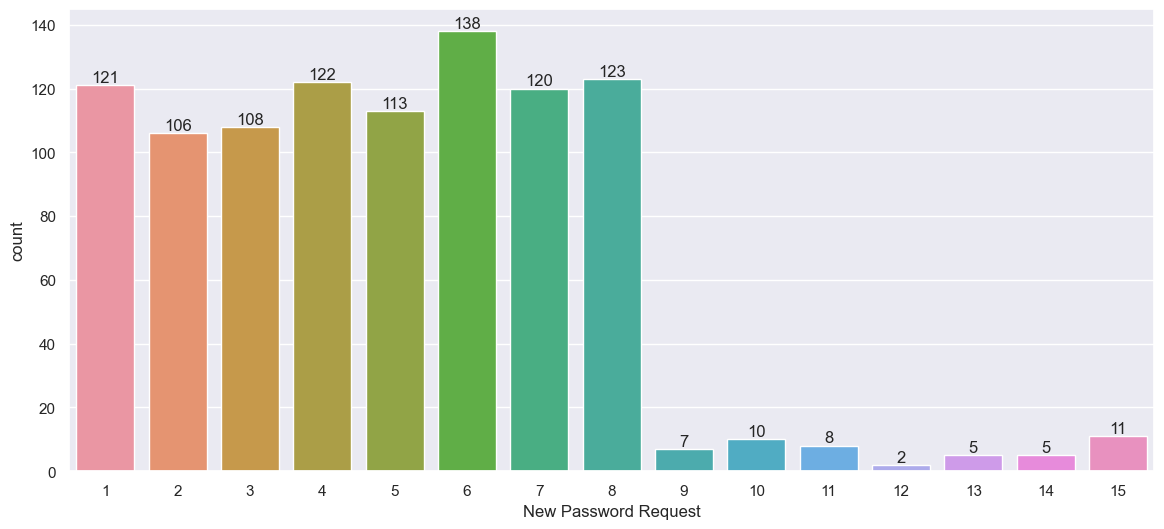

In [13]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='New Password Request',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

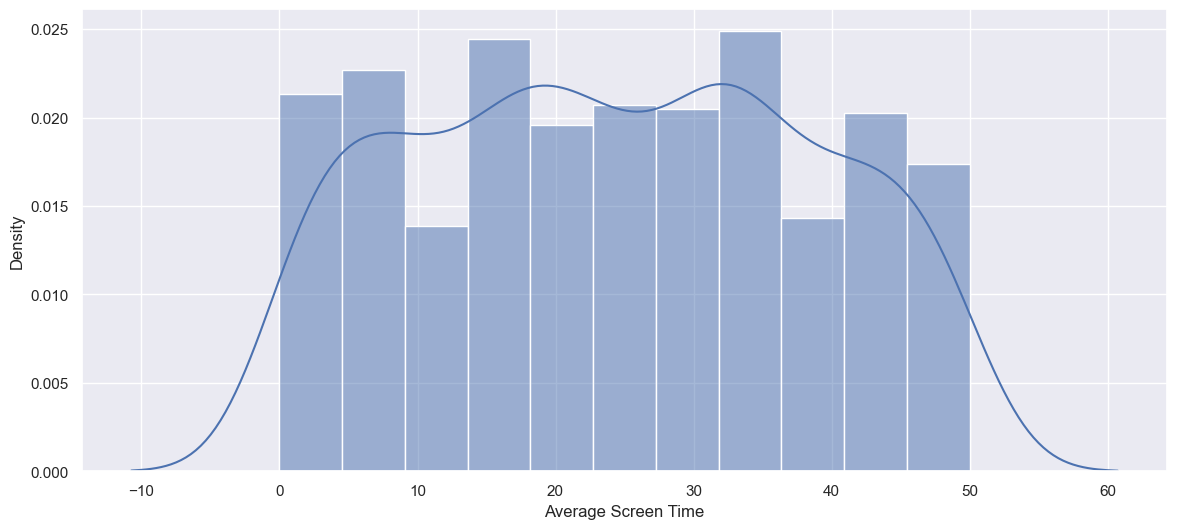

In [14]:
### Checking Distribution of Average Screen Time
plt.figure(figsize=(14,6))
sns.histplot(x='Average Screen Time',data=df,kde=True,stat='density',
             kde_kws=dict(cut=3))
plt.show()

In [15]:
df['Average Spent on App (INR)'].value_counts()

93.0     9
73.0     8
75.0     7
95.0     6
84.0     6
        ..
551.0    1
434.0    1
552.0    1
543.0    1
584.0    1
Name: Average Spent on App (INR), Length: 606, dtype: int64

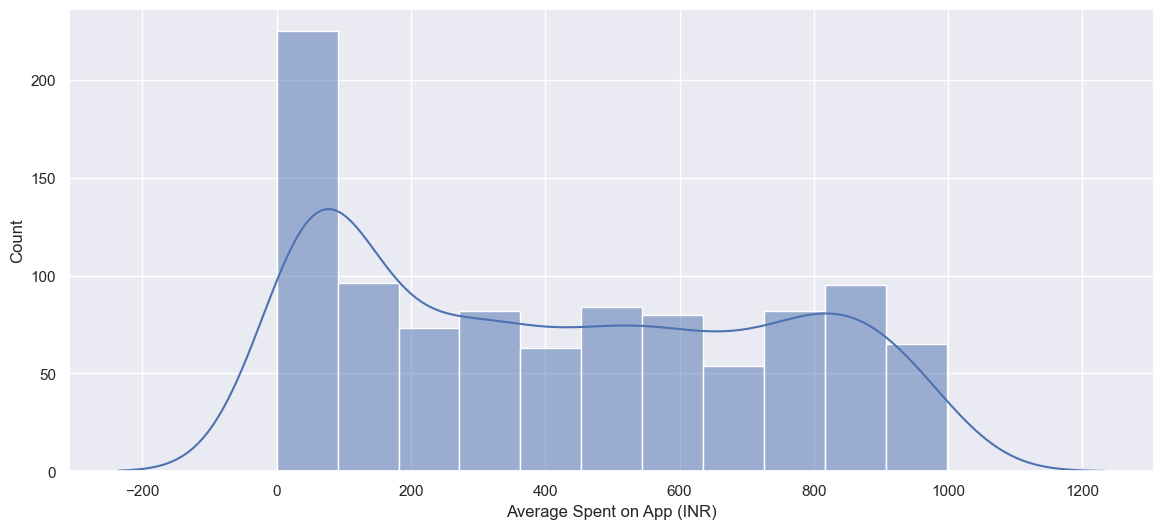

In [16]:
### Checking Distribution of Average Amount Spent on App
plt.figure(figsize=(14,6))
sns.histplot(x='Average Spent on App (INR)',data=df,kde=True,
             kde_kws=dict(cut=3))
plt.show()

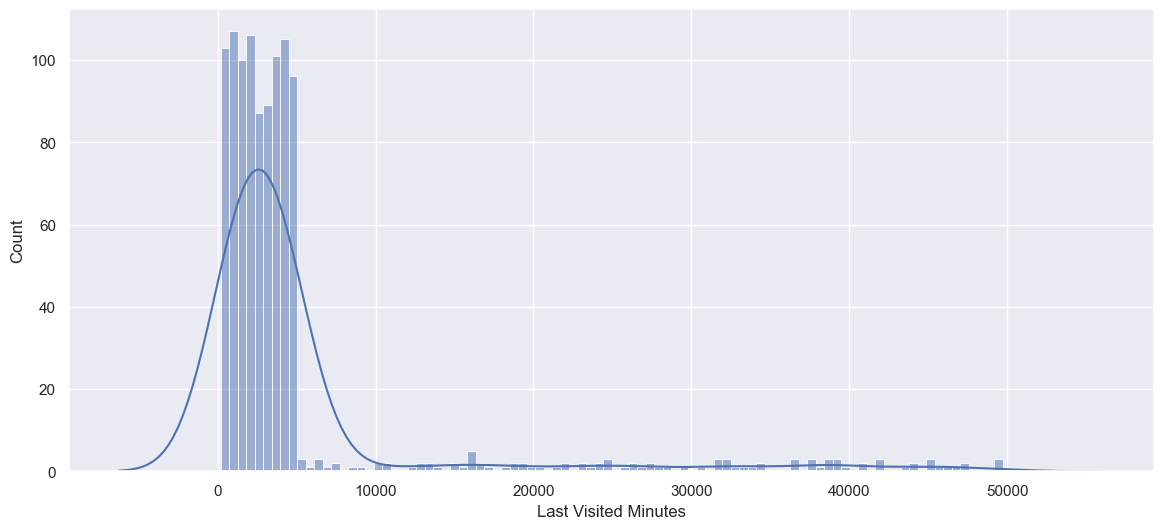

In [17]:
### Checking Distribution of Last Visited Minutes
plt.figure(figsize=(14,6))
sns.histplot(x='Last Visited Minutes',data=df,kde=True,
             kde_kws=dict(cut=3))
plt.xticks()
plt.show()

In [18]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


### Let’s look at the highest, lowest, and average screen time of all the users:

In [19]:
lowest_screen_time = df['Average Screen Time'].min()
avg_screen_time = df['Average Screen Time'].mean()
highest_screen_time = df['Average Screen Time'].max()

print(f'The Lowest Screen Time is: {lowest_screen_time}')
print(f'The Average Screen Time is: {avg_screen_time}')
print(f'The Highest Screen Time is: {highest_screen_time}')

The Lowest Screen Time is: 0.0
The Average Screen Time is: 24.39039039039039
The Highest Screen Time is: 50.0


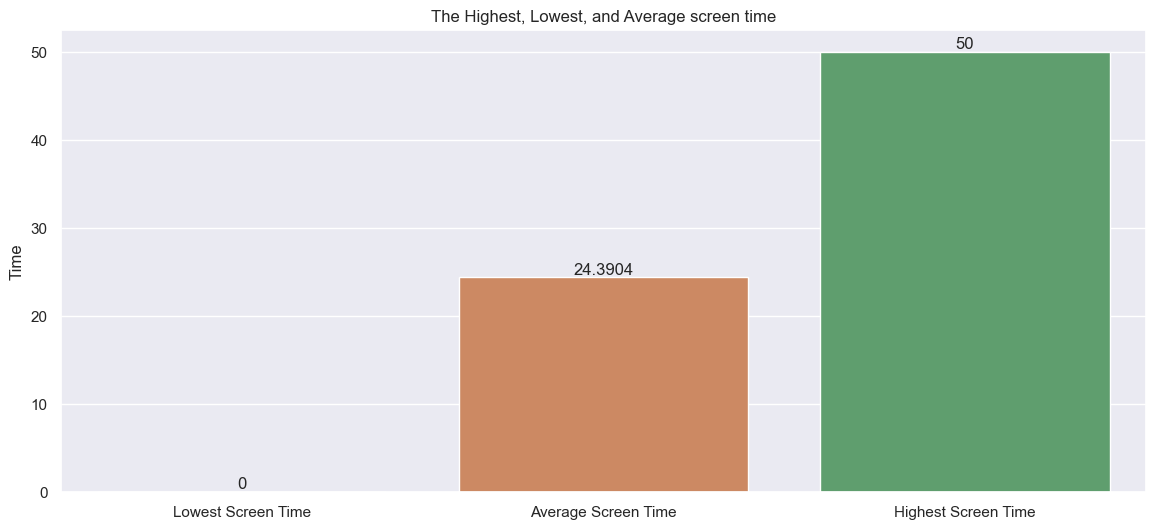

In [20]:
### Plot
labels = ['Lowest Screen Time','Average Screen Time','Highest Screen Time']
values = [lowest_screen_time,avg_screen_time,highest_screen_time]
plt.figure(figsize=(14,6))
plt.title('The Highest, Lowest, and Average screen time')
plt.ylabel('Time')
ax = sns.barplot(x=labels,y=values)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Now, Let’s have a look at the highest, lowest, and the average amount spent by all the users:

In [21]:
lowest_spend = df['Average Spent on App (INR)'].min()
avg_spend = df['Average Spent on App (INR)'].mean()
highest_spend = df['Average Spent on App (INR)'].max()

print(f'The Lowest spend on app is: {lowest_spend}')
print(f'The Average spend on app is: {avg_spend}')
print(f'The Highest spend on app is: {highest_spend}')

The Lowest spend on app is: 0.0
The Average spend on app is: 424.4154154154154
The Highest spend on app is: 998.0


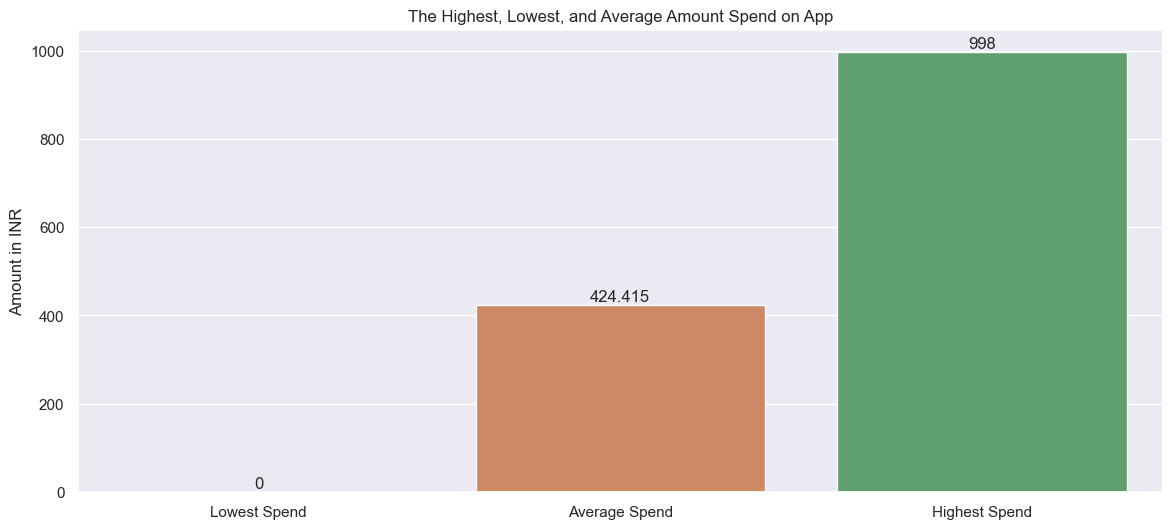

In [22]:
### Plot
labels = ['Lowest Spend','Average Spend','Highest Spend']
values = [lowest_spend,avg_spend,highest_spend]
plt.figure(figsize=(14,6))
plt.title('The Highest, Lowest, and Average Amount Spend on App')
plt.ylabel('Amount in INR')
ax = sns.barplot(x=labels,y=values)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Let’s have a look at the relationship between the spending capacity and screen time:

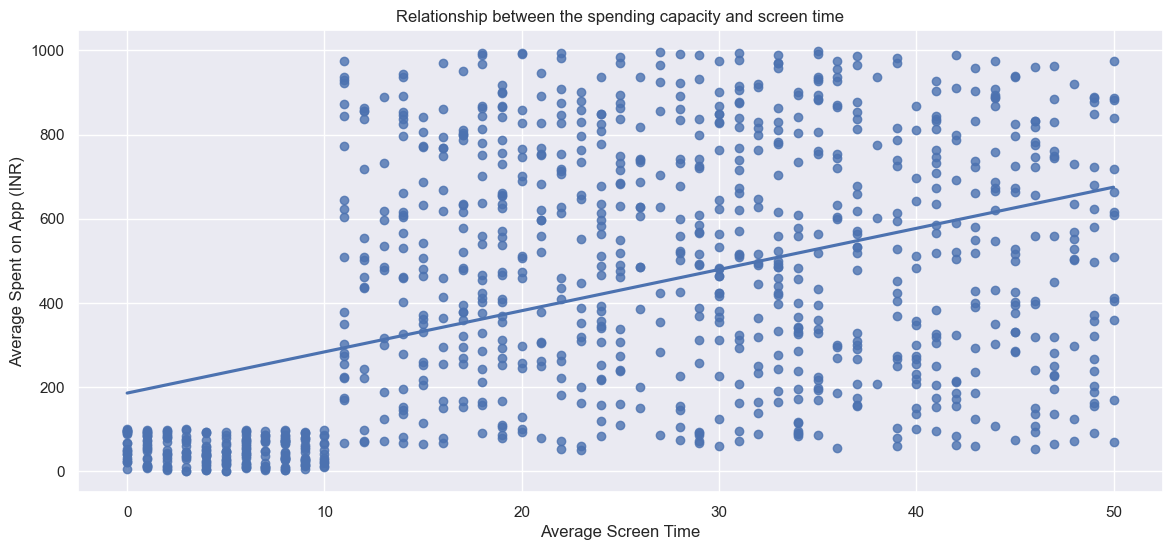

In [23]:
plt.figure(figsize=(14,6))
sns.regplot(x='Average Screen Time',y='Average Spent on App (INR)',data=df,ci=None)
plt.title('Relationship between the spending capacity and screen time')
plt.show()

### Let's also see with respect to the Status:

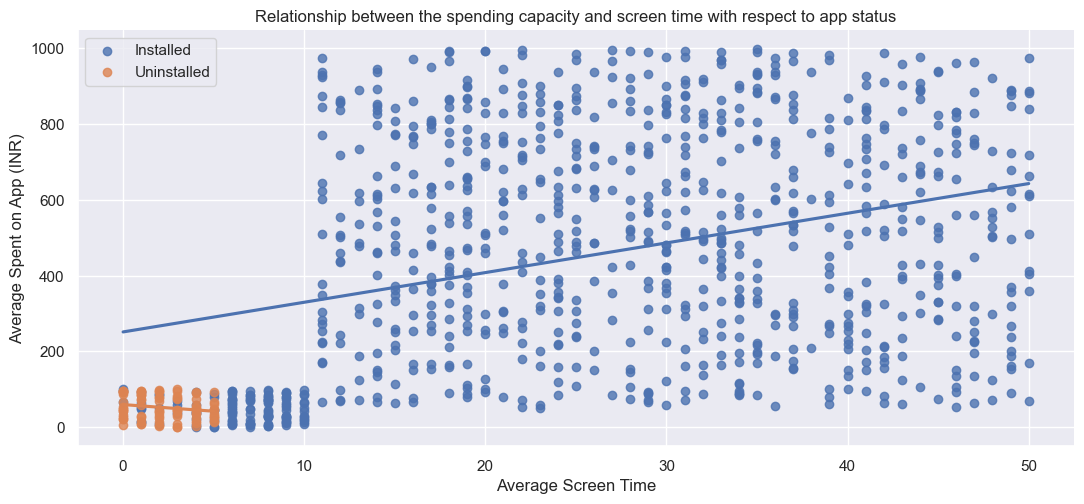

In [24]:
sns.lmplot(x='Average Screen Time',y='Average Spent on App (INR)',hue='Status',data=df,ci=None,height=5,aspect=2.2,legend=None)
plt.legend(loc='upper left')
plt.title('Relationship between the spending capacity and screen time with respect to app status')
plt.show()

- So this is great! Users who uninstalled the app had an average screen time of fewer than 5 minutes a day, and the average spent was less than 100. We can also see a linear relationship between the average screen time and the average spending of the users still using the app.

### Now let’s have a look at the relationship between the ratings given by users and the average screen time:

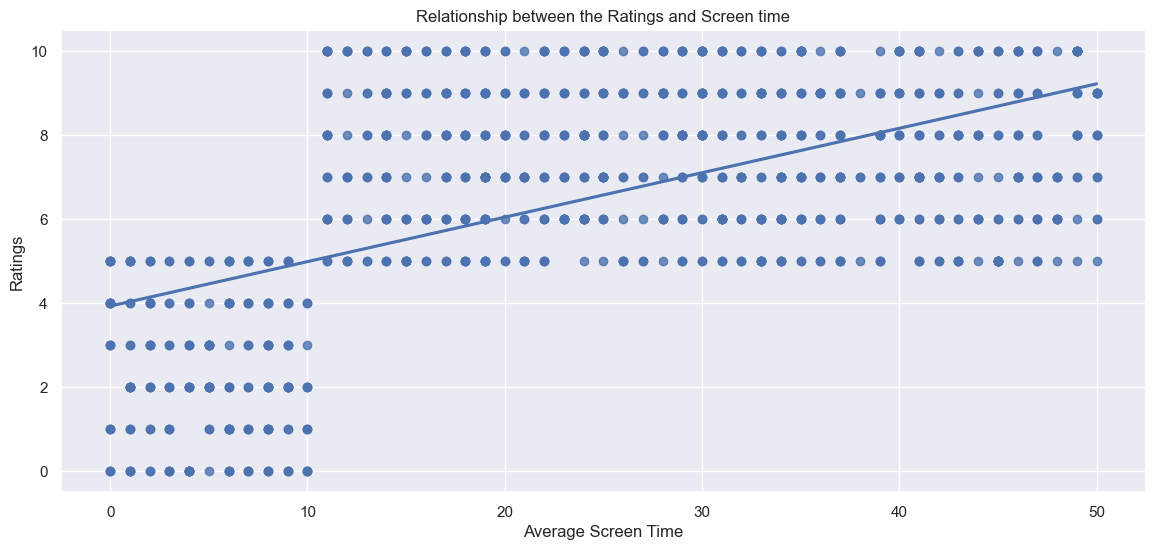

In [25]:
plt.figure(figsize=(14,6))
sns.regplot(x='Average Screen Time',y='Ratings',data=df,ci=None)
plt.title('Relationship between the Ratings and Screen time')
plt.show()

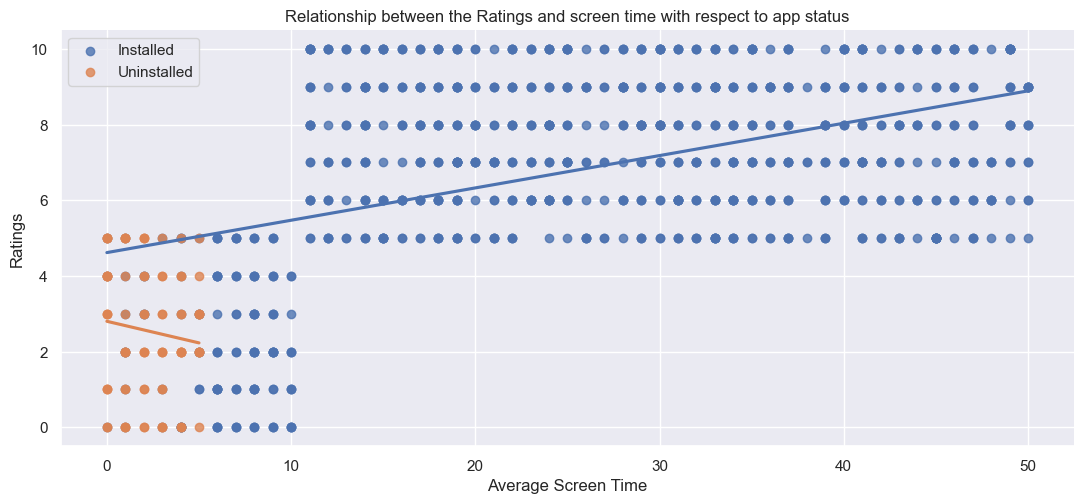

In [26]:
sns.lmplot(x='Average Screen Time',y='Ratings',hue='Status',data=df,ci=None,height=5,aspect=2.2,legend=None)
plt.legend(loc='upper left')
plt.title('Relationship between the Ratings and screen time with respect to app status')
plt.show()

- So we can see that users who uninstalled the app gave the app a maximum of five ratings. Their screen time is very low compared to users who rated more. So, this describes that users who don’t like to spend more time rate the app low and uninstall it at some point.

### Model

In [27]:
clustering_data = df[["Average Screen Time", "Left Review", 
                        "Ratings", "Last Visited Minutes", 
                        "Average Spent on App (INR)", 
                        "New Password Request"]]

In [28]:
for i in clustering_data.columns:
    MinMaxScaler(i)

In [29]:
clustering_data.head()

,Average Screen Time,Left Review,Ratings,Last Visited Minutes,Average Spent on App (INR),New Password Request
0,17.0,1,9,2990,634.0,7
1,0.0,0,4,24008,54.0,8
2,37.0,0,8,971,207.0,5
3,32.0,1,6,799,445.0,2
4,45.0,1,5,3668,427.0,6


In [30]:
k_range = range(1,9)
wcss = []
for i in (k_range):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit_predict(clustering_data)
    wcss.append(kmeans.inertia_)
wcss

[73773040009.083,
 10800434727.639164,
 4782481357.633918,
 3254984220.267616,
 1929889543.128203,
 1318491498.987225,
 1063681846.6254355,
 817512000.0644786]

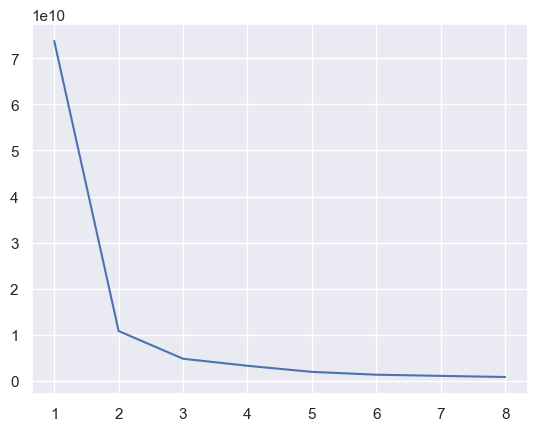

In [31]:
plt.plot(k_range,wcss)
plt.show()

### Main model

In [32]:
kmeans_model = KMeans(n_clusters=3,n_init=10)
clusters = kmeans_model.fit_predict(clustering_data)
df['Segments'] = clusters

In [33]:
df

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17.0,634.0,1,9,7,2990,Installed,0
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,1
2,1003,37.0,207.0,0,8,5,971,Installed,0
3,1004,32.0,445.0,1,6,2,799,Installed,0
4,1005,45.0,427.0,1,5,6,3668,Installed,0
...,...,...,...,...,...,...,...,...,...
994,1995,38.0,938.0,0,5,4,1865,Installed,0
995,1996,43.0,61.0,0,6,8,1327,Installed,0
996,1997,47.0,761.0,0,6,1,1936,Installed,0
997,1998,6.0,73.0,1,5,1,3436,Installed,0


In [34]:
df['Segments'].value_counts()

0    910
2     45
1     44
Name: Segments, dtype: int64

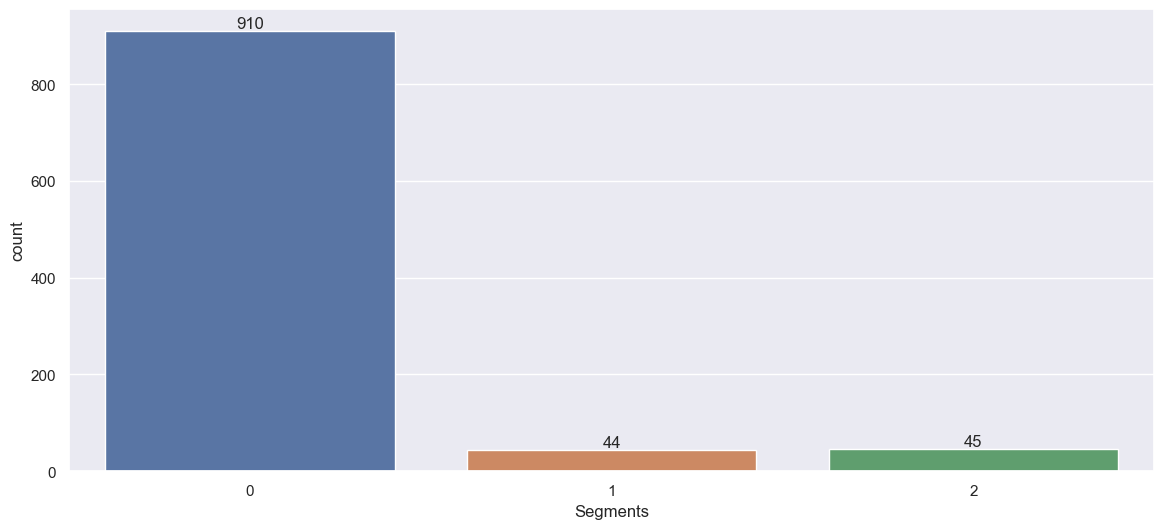

In [35]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Segments',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Segmentation with respect to average screen time and average spent on App

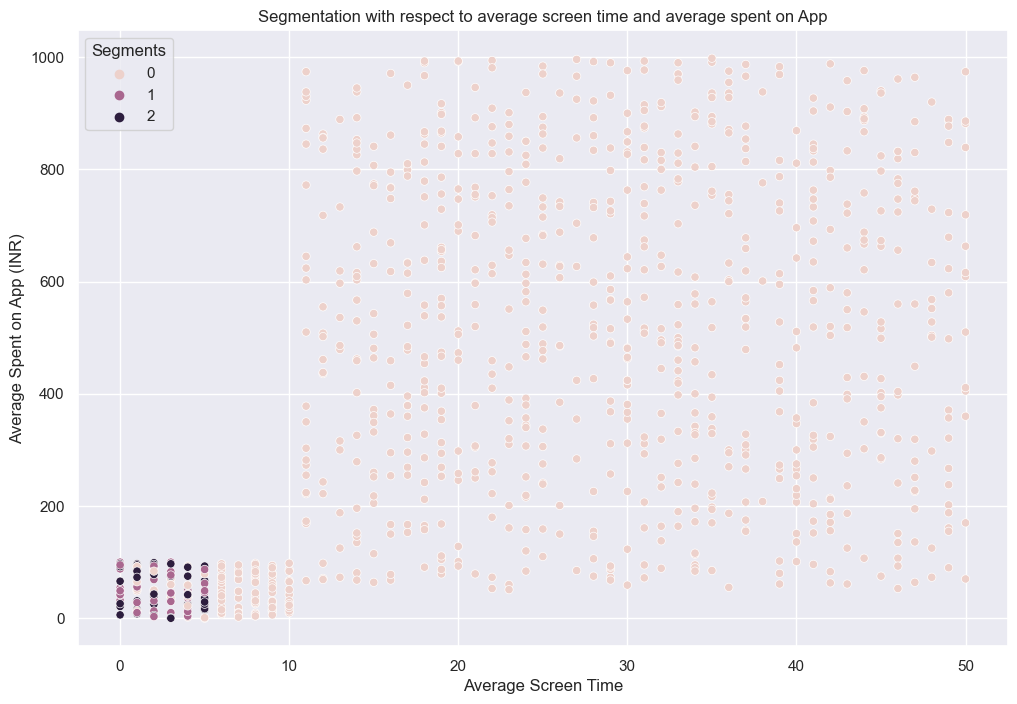

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Average Screen Time',y='Average Spent on App (INR)',hue='Segments',data=df)
plt.title("Segmentation with respect to average screen time and average spent on App")
plt.show()

### Now let’s rename the segments for a better understanding:

In [37]:
df["Segments"] = df["Segments"].map({0: "Retained", 1: 
    "Churn", 2: "Needs Attention"})
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17.0,634.0,1,9,7,2990,Installed,Retained
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,Churn
2,1003,37.0,207.0,0,8,5,971,Installed,Retained
3,1004,32.0,445.0,1,6,2,799,Installed,Retained
4,1005,45.0,427.0,1,5,6,3668,Installed,Retained


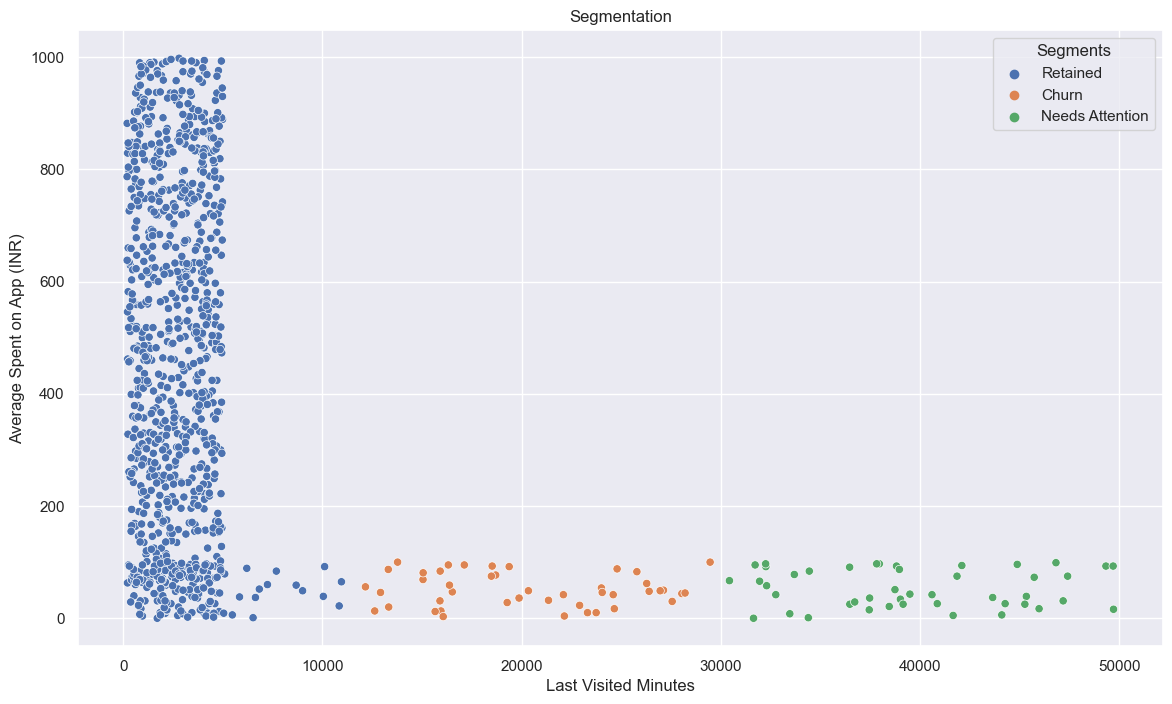

In [38]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x='Last Visited Minutes', y='Average Spent on App (INR)', hue='Segments')
plt.xlabel('Last Visited Minutes')
plt.ylabel('Average Spent on App (INR)')
plt.title('Segmentation')
plt.show()


- The blue segment shows the segment of users the app has retained over time. The orange segment indicates the segment of users who just uninstalled the app or are about to uninstall it soon. And the green segment indicates the segment of users that the application has lost.